In [5]:
%load_ext autoreload
%autoreload 2

def int_to_suffix(number):
    return f"{number:04d}"

import os,sys
sys.path.append('/users/danieljordan/DEEPlasma/')


from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser_ts = ParserTimeseries()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# First Look

In [6]:
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser_ts = ParserTimeseries()

[-1.0469e-16  1.3913e+00  2.5147e+00 ...  1.9777e+02  2.7907e+02
  3.7485e+02]


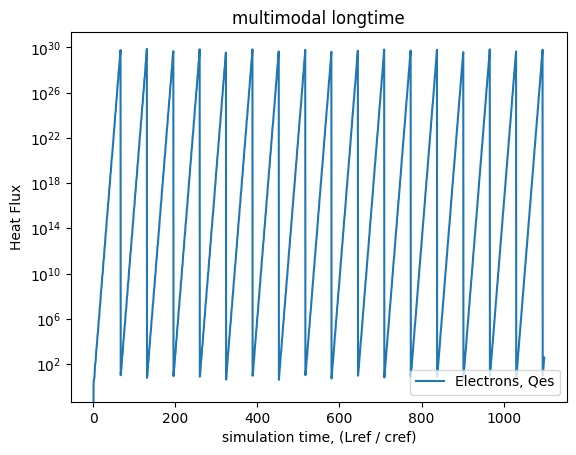

(array([0.000000e+00, 4.220000e-01, 8.440000e-01, ..., 1.098466e+03,
        1.098888e+03, 1.099310e+03]),
 array([-1.0469e-16,  1.3913e+00,  2.5147e+00, ...,  1.9777e+02,
         2.7907e+02,  3.7485e+02]))

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser = GENE_scan_parser()
parser_ts = ParserTimeseries()

nrg_path =  '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/nrg_0010' 

nrg_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/nrg_0010' 
nrg_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/nrg_0006' 
nrg_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/nrg_0005' 

def plot_Qes_history(nrg_path, title, tlim=None):
    species = parser_ts.read_species_names(parameters_path='/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/parameters')
    Qes, time = parser_ts.Qes_history(nrg_path)
    Qem, time = parser_ts.Qem_history(nrg_path)
    
    if tlim != None:
        tdif = np.abs(time-tlim)
        time = time[0:np.argmin(tdif)]
        Qes['1'] = Qes['1'][0:np.argmin(tdif)] 
    plt.figure()
    plt.title(title)

    plt.plot(time, Qes['1'], label=f'{species[0]}, Qes')
    print(Qes['1'])
    delta = Qes['1'] - np.roll(Qes['1'],1)
    
    # plt.plot(Qes['1'], label=f'{species[0]}, Qes', color='red')
    # plt.plot(delta, label=f'{species[0]}, Qes', color='red')
    
    # plt.xlim(0,200)
    # print(time[132])
    # print(delta[158])
    # print(Qes['1'][157])
    # print(Qes['1'][158])
    
    # plt.plot(time, Qes['2'], label=f'{species[1]}, Qes', color='orange')

    # plt.plot(time, Qem['1'], label=f'{species[0]}, Qem', color = 'blue')
    # plt.plot(time, Qem['2'], label=f'{species[1]}, Qem', color = 'cyan')
    plt.xlabel('simulation time, (Lref / cref)')
    plt.ylabel('Heat Flux')
    plt.yscale('log')
    plt.legend()
    plt.show()
    return time, Qes['1']

# plot_Qes_history(nrg_path_multimodal, title='multimodal')
plot_Qes_history(nrg_path_multimodal_longtime, title='multimodal longtime')
# plot_Qes_history(nrg_path_non_multimodal, title='NON multimodal')

In [11]:
import sys
sys.path.append('/users/danieljordan/DEEPlasma/old_files_march_2025')
import matplotlib.pyplot as plt
# from config import Config
import numpy as np
import os
from scipy.fft import fft, fftfreq
from GENE_ML.gene_ml.runners.calculate_growthrate import calculate_growthrate
from GENE_ML.gene_ml.runners.calculate_growthrate import calculate_growthrate2

# config = Config()
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries

parser = GENE_scan_parser()
parser_ts = ParserTimeseries()

energy_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/energy_0010' 
field_path_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/field_0010' 

energy_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/energy_0006' 
field_path_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/field_0006' 

energy_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/energy_0005' 
field_path_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/field_0005' 

def plot_growthrate_history(scanfiles_dir, suffix, title='', tlim=None, converged_value=None, xlim=[None, None], ylim=[None,None]):
    energy_path = os.path.join(scanfiles_dir,f'energy_{suffix}')
    nrg_path = os.path.join(scanfiles_dir,f'nrg_{suffix}')
    time_units_to_average = 10
    # fig = plt.figure()
    
    if nrg_path != None:
        Qes, time_qes = parser_ts.Qes_history(nrg_path)
        eQes = Qes['1']
        time_in_1_index_shift = time_qes[-1] / len(time_qes)
        index_shift = int(time_units_to_average/time_in_1_index_shift)
        Qes_growthrate = np.empty(0)
        Q_gr_time = np.empty(0)
        # plt.figure()
        # plt.plot(time_qes, np.log(eQes))
        # plt.xlim(*xlim)
        for i in range(index_shift,len(time_qes)):
            Qrange = np.log(eQes[i-index_shift:i])
            range_t = time_qes[i-index_shift:i]
            coeff = np.polyfit(range_t, Qrange, 1)
            Qes_gr = coeff[0]/2
            Qes_growthrate = np.append(Qes_growthrate,Qes_gr)
            Q_gr_time = np.append(Q_gr_time, time_qes[i])
        #     plt.plot(range_t, Qes_gr*range_t + coeff[1])
    plt.figure()
    plt.title(title)
    print(Qes_growthrate)
    plt.plot(Q_gr_time, Qes_growthrate, label='eQes growthrate')

    

    growthrate1, time1 = calculate_growthrate2(scanfiles_dir, suffix)
    growthrate, time = parser_ts.growthrate_history(energy_path)
    #s = i*120
    if tlim != None:
        tdif = np.abs(time - tlim)
        tdif1 = np.abs(time1 - tlim)
        t = time[0:np.argmin(tdif)]#[s:s+120]
        t1 = time1[0:np.argmin(tdif1)]#[s:s+120]
        gr = growthrate[0:np.argmin(tdif)]#[s:s+120]
        gr1 = growthrate1[0:np.argmin(tdif1)]#[s:s+120]
        
    else:
        t = time
        t1 = time1
        gr = growthrate
        gr1 = growthrate1
    
    plt.ylabel('Growthrate')
    plt.plot(t, gr, label='Tobias Growthrate')
    time_in_1_index_shift = t[-1] / len(t)
    index_shift = int(time_units_to_average/time_in_1_index_shift)
    gr_mean = np.empty(0)
    t_m = np.empty(0)
    for i in range(index_shift, len(t)):
        gr_m = np.mean(gr[i-index_shift:i])
        gr_mean = np.append(gr_mean, gr_m)
        t_m = np.append(t_m, t[i])
    # plt.plot(t_m, gr_mean, '--', color='orange')


    # plt.hlines(np.mean(gr), np.min(t), np.max(t), color='blue')
    # gr1[np.argwhere(gr1<-1)]=0
    plt.plot(t1, gr1, label='David Grothrate', color='green')
    # indexes in 10time units
    time_in_1_index_shift = t1[-1] / len(t1)
    index_shift = int(time_units_to_average/time_in_1_index_shift)
    print('indext shift:',index_shift)
    gr_mean = np.empty(0)
    t1_m = np.empty(0)
    for i in range(index_shift, len(t1)):
        gr_m = np.mean(gr1[i-index_shift:i])
        gr_mean = np.append(gr_mean, gr_m)
        t1_m = np.append(t1_m, t1[i])
    plt.plot(t1_m, gr_mean, '--', color='green')
    # plt.hlines(np.mean(gr1), np.min(t1), np.max(t1), color='orange')

    # plt.vlines(64.218, -20, 2, color = 'red')
    plt.legend()
    
    plt.xlabel('simulation time, (Lref/cref)')
    if converged_value != None:
        plt.hlines(converged_value,0,t[-1], color='black')
    # plt.yscale('log')
    
    plt.ylim(*ylim)
    plt.xlim(*xlim)
    # fig.show()
    plt.show()

    # plt.figure()
    # plt.title(title)
    # plt.ylabel('Fourrier Growthrate')
    # plt.xlabel('frequency')
    
    
    # N = len(gr)
    # sample_rate = time[-1]/N
    # T = 1.0 / sample_rate
    # fourrier_growthrate = np.abs(fft(gr)[0:N//2])
    # frequency = fftfreq(N,T)[0:N//2]
    # plt.plot(frequency, fourrier_growthrate)
    # # plt.ylim(0,60)
    # plt.yscale('log')
    # # plt.xlim(s,s+120)

scanfiles_dir_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/'
scanfiles_dir_multimodal_longtime = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/'
scanfiles_dir_non_multimodal = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-3/scanfiles0000/'

# plot_growthrate_history(energy_path_multimodal, scanfiles_dir_multimodal, '0010', 'multimodal')

# plot_growthrate_history(energy_path_multimodal_longtime, scanfiles_dir_multimodal_longtime, '0006', 'multimodal_longtime', xlim=[0,100], ylim=[0,1])

# plot_growthrate_history(energy_path_non_multimodal, scanfiles_dir_non_multimodal, '0005', 'NON multimodal')


[3.9730e-17 3.1733e-01 5.6257e-01 ... 4.6183e+10 4.7398e+10 4.8626e+10]


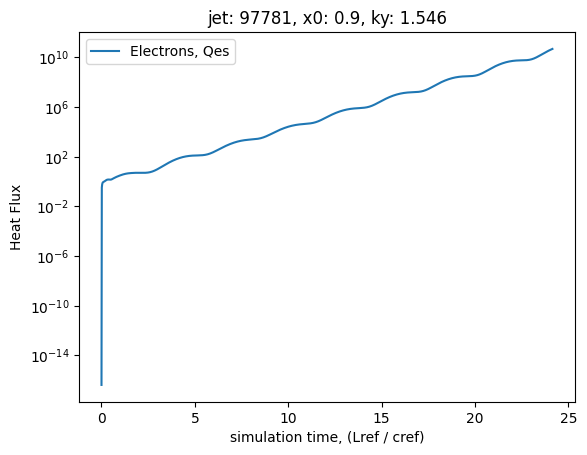

[0.52297411 0.50389871 0.50359376 0.50357239 0.50367319 0.50383
 0.5040103  0.5041997  0.50439404 0.50459425 0.50480315 0.50502357
 0.50525707 0.50550368 0.50576192 0.50602935 0.50630307 0.50658004
 0.50685741 0.50713255 0.50740301 0.50766646 0.50792042 0.50816245
 0.50839024 0.50860203 0.50879691 0.50897518 0.50913838 0.50928895
 0.50943004 0.50956478 0.50969615 0.50982659 0.50995793 0.51009135
 0.51022742 0.51036637 0.51050814 0.51065248 0.51079906 0.51094752
 0.51109751 0.51124858 0.51140023 0.51155198 0.51170347 0.51185441
 0.51200443 0.51215317 0.51230029 0.51244548 0.51258857 0.51272942
 0.51286794 0.51300398 0.51313744 0.51326822 0.51339626 0.51352155
 0.51364402 0.51376359 0.51388014 0.51399356 0.51410376 0.51421063
 0.51431407 0.51441398 0.51451029 0.51460293 0.51469187 0.51477705
 0.51485841 0.51493587 0.51500935 0.51507875 0.51514402 0.51520511
 0.51526197 0.5153146  0.515363   0.5154072  0.51544722 0.51548313
 0.51551499 0.51554286 0.51556683 0.51558702 0.51560354 0.5156165

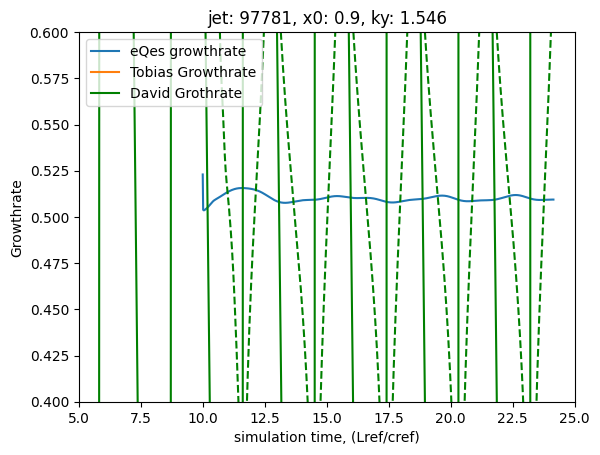

In [12]:
scanfiles_dir = '/scratch/project_462000451/gene_out/early_convergence_test/scanfiles0070_sucess'
energy_path = '/scratch/project_462000451/gene_out/early_convergence_test/scanfiles0070_sucess/energy_0002'
field_path = '/scratch/project_462000451/gene_out/early_convergence_test/scanfiles0070_sucess/field_0002' 
nrg_path = '/scratch/project_462000451/gene_out/early_convergence_test/scanfiles0070_sucess/nrg_0002' 

plot_Qes_history(nrg_path,'jet: 97781, x0: 0.9, ky: 1.546')
plot_growthrate_history(scanfiles_dir, '0002', 'jet: 97781, x0: 0.9, ky: 1.546', xlim=[5,25], ylim=[0.4,0.6])#, xlim=[70,100], ylim=[0,1.5])#, xlim=[175, 200], ylim=[0.536,0.537])
# plt.hlines(0.5365,175,200)

/tmp/ipykernel_166087/3335138451.py:44: RuntimeWarning: invalid value encountered in log
  Qrange = np.log(eQes[i-index_shift:i])


[0.97629627 0.50411237 0.50995715 ... 0.52504575 0.52504528 0.52504409]
indext shift: 3


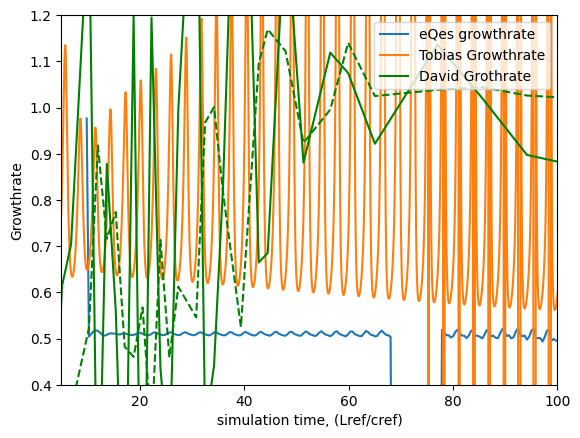

In [13]:
scanfiles_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/'
energy_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/energy_0004'
field_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/field_0004'
nrg_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-6/scanfiles0000/nrg_0004' 

# plot_Qes_history(nrg_path,'Qes')
# plot_growthrate_history(energy_path, scanfiles_dir, '0004', 'istep 100',nrg_path=nrg_path, xlim=[400,700], ylim=[0.4,1.2])#, xlim=[175, 200], ylim=[0.536,0.537])
plot_growthrate_history(scanfiles_dir, '0004', xlim=[5,100], ylim=[0.4,1.2])
# plt.hlines(0.525,600,700,color='black', label='GENE converged growthrate')
# plt.legend()

[-4.3445e-17  2.5928e+00  3.9362e+00  6.4320e+00  8.4504e+00  1.0156e+01
  1.3140e+01  2.1616e+01  4.1488e+01  7.7403e+01  1.2696e+02  1.8002e+02
  2.3652e+02  3.3552e+02  5.6023e+02  9.9904e+02  1.6836e+03  2.5484e+03
  3.5093e+03  4.7949e+03  7.4140e+03  1.3144e+04  2.3479e+04  3.8100e+04
  5.4743e+04  7.2608e+04  9.9936e+04  1.6156e+05  2.9531e+05  5.2762e+05
  8.4147e+05  1.1824e+06  1.5509e+06  2.1713e+06  3.6112e+06  6.6331e+06
  1.1659e+07  1.8195e+07  2.5184e+07  3.3215e+07  4.7999e+07  8.1999e+07
  1.4986e+08  2.5696e+08  3.9040e+08  5.3236e+08  7.1066e+08  1.0663e+09
  1.8667e+09  3.3822e+09  5.6492e+09  8.3553e+09  1.1250e+10  1.5274e+10
  2.3797e+10  4.2421e+10  7.5925e+10  1.2356e+11  1.7836e+11  2.3836e+11
  3.3091e+11  5.3406e+11  9.6209e+11  1.6941e+12  2.6863e+12  3.7964e+12
  5.0668e+12  7.2313e+12  1.2044e+13  2.1769e+13  3.7586e+13  5.8080e+13
  8.0626e+13  1.0815e+14  1.5930e+14  2.7247e+14  4.9102e+14  8.2926e+14
  1.2498e+15  1.7107e+15  2.3209e+15  3.5349e+15  6

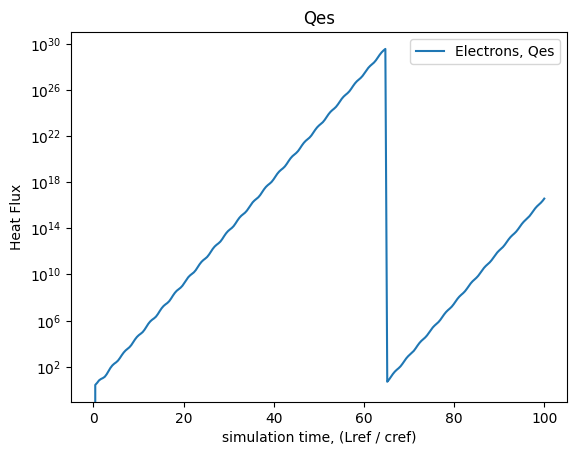

/tmp/ipykernel_166087/3335138451.py:44: RuntimeWarning: invalid value encountered in log
  Qrange = np.log(eQes[i-index_shift:i])


[        nan  0.51916118  0.52341032  0.52549605  0.52709327  0.52740737
  0.52652586  0.52470122  0.52347265  0.52341415  0.52360237  0.52347833
  0.52340039  0.52338996  0.52356553  0.52443647  0.52545869  0.52550866
  0.52454173  0.52344172  0.52271713  0.52294581  0.52437131  0.52588418
  0.52617267  0.52526129  0.52396429  0.52292197  0.52302818  0.52440435
  0.52576409  0.52594582  0.52513211  0.52397134  0.5230743   0.52335126
  0.52467839  0.52572158  0.5256181   0.52475978  0.52370648  0.52308566
  0.52367032  0.52501135  0.52577194  0.52540752  0.52446343  0.52346159
  0.5231023   0.52396099  0.52528362  0.52579255  0.52524026  0.52423931
  0.52330064  0.52319307  0.52424934  0.5254789   0.5257411   0.52505418
  0.52403343  0.52320393  0.52335479  0.52453947  0.52561054  0.5256315
  0.52484367  0.52382905  0.52315553  0.52356536  0.52481646  0.52568688
  0.525487    0.52462413  0.52363812  0.5231588   0.52380974  0.52506532
  0.52571042  0.52532111  0.52440692  0.52347719  0.

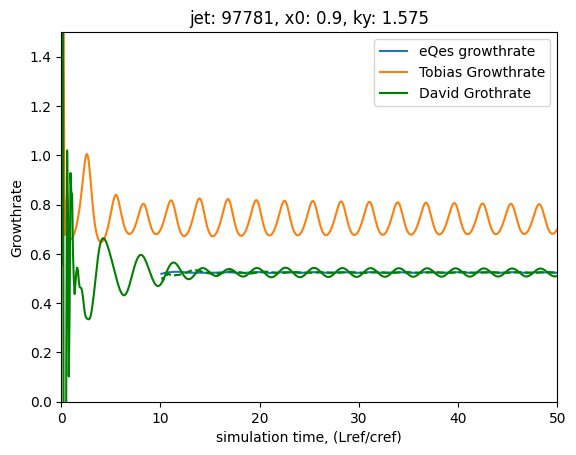

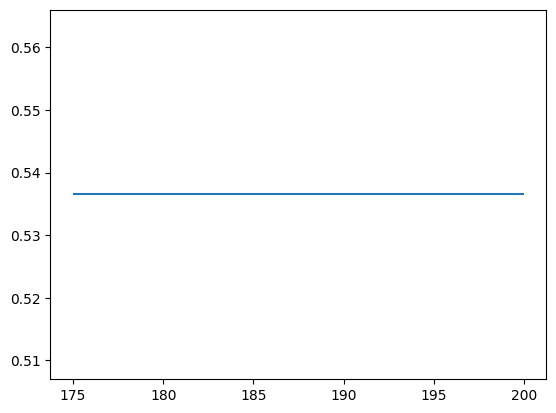

In [14]:
scanfiles_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/'#'/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scalecd ../.._batch-5/scanfiles0000/'
energy_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/energy_0004'#'/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale/ex-jet_97781_ion-scale_batch-5/scanfiles0000/energy_0010' 
field_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/field_0004' 
nrg_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/nrg_0004' 

plot_Qes_history(nrg_path,'Qes')
plot_growthrate_history(scanfiles_dir, '0004', 'jet: 97781, x0: 0.9, ky: 1.575', xlim=[0,50], ylim=[0,1.5])#, xlim=[175, 200], ylim=[0.536,0.537])
# plot_growthrate_history(scanfiles_dir, '0004', xlim=[5,25], ylim=[0,2])#, xlim=[175, 200], ylim=[0.536,0.537])

plt.hlines(0.5365,175,200)

[]
indext shift: 124


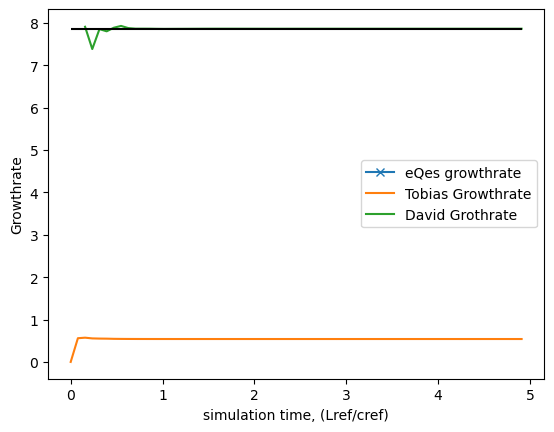

In [ ]:
dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_98/ex-jet_97781_ion-scale_98_batch-1/scanfiles0000'
plot_growthrate_history(dir, '0011', converged_value=7.8630)#, '', xlim=[0,50], ylim=[0,1.5])#, xlim=[175, 200], ylim=[0.536,0.537])


# trying to determine if it is multi modal or not
simply by seeing if the electron heat flux is linear or not

[        nan  1.9154375   1.93000841  1.93712887  1.93415904  1.9361157
  1.93506837  1.93571119  0.04456801 -1.37381921 -2.31920492]
indext shift: 42


/tmp/ipykernel_166087/3335138451.py:44: RuntimeWarning: invalid value encountered in log
  Qrange = np.log(eQes[i-index_shift:i])


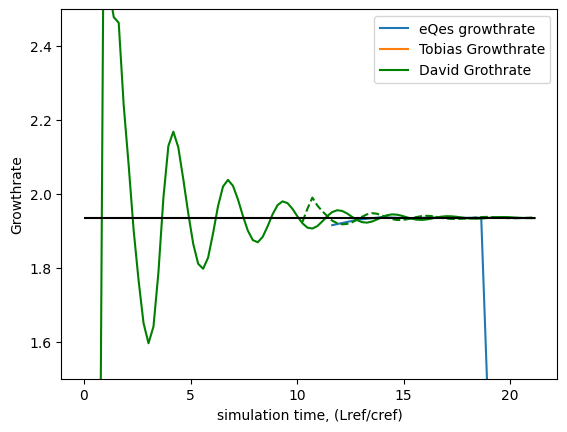

[-9.0047e-16  7.0334e+01  4.5927e+03  3.0296e+05  3.1970e+07  2.6507e+09
  2.5349e+11  2.2549e+13  2.0483e+15  1.8756e+17  1.6877e+19  1.5510e+21
  1.3978e+23  1.2795e+25  1.1581e+27  1.0562e+29  1.8949e+02  1.7244e+04
  1.5677e+06  3.2254e+06]


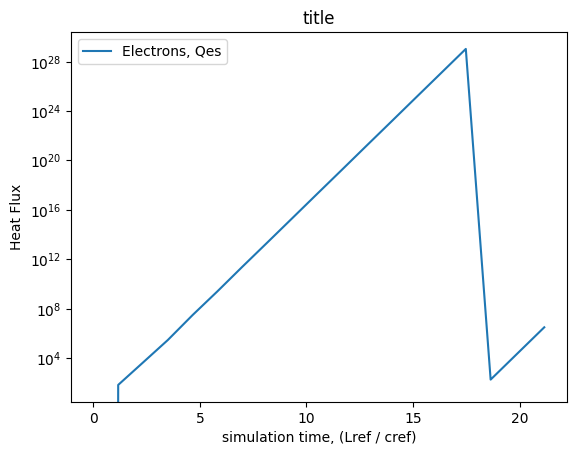

linear_fit [ 4.01902248  8.45508808 12.89115367 17.32721927 21.76328487 26.19935047
 30.63541607]
deviations [ 0.23423285 -0.02286471 -0.26979761 -0.04691075 -0.06519528  0.05923974
  0.11129577]
peaks [3]
peak distances []
The wavelength of the oscillations is: None
[-4.3445e-17  2.5928e+00  3.9362e+00  6.4320e+00  8.4504e+00  1.0156e+01
  1.3140e+01  2.1616e+01  4.1488e+01  7.7403e+01  1.2696e+02  1.8002e+02
  2.3652e+02  3.3552e+02  5.6023e+02  9.9904e+02  1.6836e+03  2.5484e+03
  3.5093e+03  4.7949e+03  7.4140e+03  1.3144e+04  2.3479e+04  3.8100e+04
  5.4743e+04  7.2608e+04  9.9936e+04  1.6156e+05  2.9531e+05  5.2762e+05
  8.4147e+05  1.1824e+06  1.5509e+06  2.1713e+06  3.6112e+06  6.6331e+06
  1.1659e+07  1.8195e+07  2.5184e+07  3.3215e+07  4.7999e+07  8.1999e+07
  1.4986e+08  2.5696e+08  3.9040e+08  5.3236e+08  7.1066e+08  1.0663e+09
  1.8667e+09  3.3822e+09  5.6492e+09  8.3553e+09  1.1250e+10  1.5274e+10
  2.3797e+10  4.2421e+10  7.5925e+10  1.2356e+11  1.7836e+11  2.3836e+11
  

/tmp/ipykernel_166087/1635851483.py:57: RuntimeWarning: divide by zero encountered in log
  points = [(t, q) for t,q in zip(time, np.log(Qes))]
/tmp/ipykernel_166087/1635851483.py:58: RuntimeWarning: divide by zero encountered in log
  plt.plot(time[s:n], np.log(Qes)[s:n])


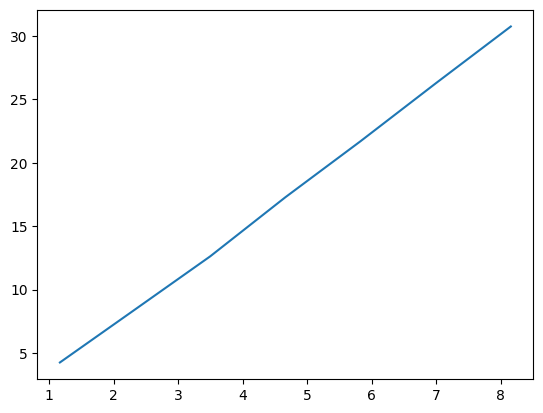

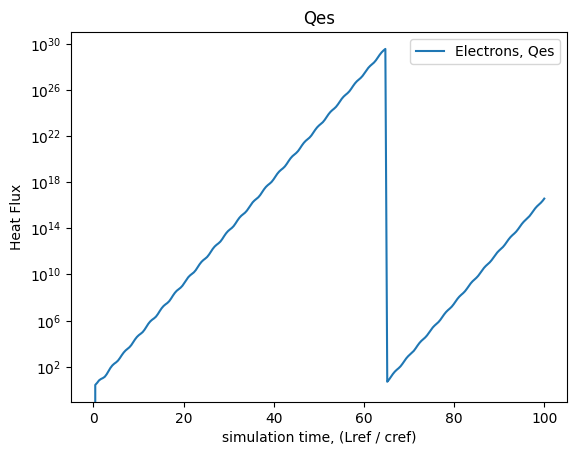

linear_fit [ 0.75044131  1.18750578  1.62457025  2.06163471  2.49869918  2.93576365
  3.37282812  3.80989259  4.24695705  4.68402152  5.12108599  5.55815046
  5.99521493  6.4322794   6.86934386  7.30640833  7.7434728   8.18053727
  8.61760174  9.0546662   9.49173067  9.92879514 10.36585961 10.80292408
 11.23998855 11.67705301 12.11411748 12.55118195 12.98824642]
deviations [ 0.20229706  0.18271001  0.23671529  0.07257906 -0.18063452 -0.36010264
 -0.29939434 -0.08448836  0.10206848  0.15985055  0.07198196 -0.09211769
 -0.17953336 -0.10393198  0.03745095  0.1222813   0.09974819 -0.0173654
 -0.1422936  -0.14354082 -0.00801001  0.13506654  0.18210995  0.10748071
 -0.04715816 -0.16476775 -0.12148561  0.04459898  0.18788519]
peaks [ 2  9 15 22]
peak distances [2.9435 2.523  2.9435]
The wavelength of the oscillations is 2: 2.8033333333333332


/tmp/ipykernel_166087/1635851483.py:68: RuntimeWarning: divide by zero encountered in log
  points = [(t, q) for t,q in zip(time, np.log(Qes))]
/tmp/ipykernel_166087/1635851483.py:69: RuntimeWarning: divide by zero encountered in log
  plt.plot(time[s:n], np.log(Qes)[s:n])


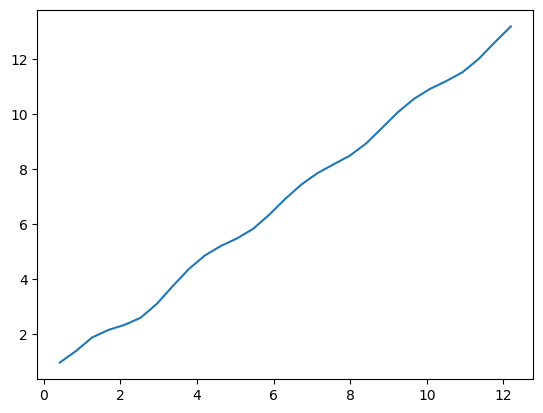

In [37]:
dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_98/ex-jet_97781_ion-scale_98_batch-0/scanfiles0000'
plot_growthrate_history(dir, '0007', ylim=[1.5,2.5], converged_value=1.9350)#, '', xlim=[0,50], ylim=[0,1.5])#, xlim=[175, 200], ylim=[0.536,0.537])
time, Qes = plot_Qes_history(nrg_path=os.path.join(dir,'nrg_0007'),title='title')
Qes = np.array(Qes)
Qes[Qes<0] = 0
import numpy as np

import numpy as np
from scipy.signal import find_peaks

def calculate_wavelength(points):
    """
    Calculate the wavelength of oscillations around a linear line given an array of points.
    
    Parameters:
    points (list of tuples): List of (x, y) points
    
    Returns:
    float: The wavelength of the oscillations
    """
    # Convert points to numpy array for easier manipulation
    points = np.array(points)
    
    # Fit a linear line to the points
    x = points[:, 0]
    y = points[:, 1]
    coefficients = np.polyfit(x, y, 1)
    linear_fit = np.polyval(coefficients, x)
    
    # Calculate the deviations from the linear fit
    deviations = y - linear_fit
    print('linear_fit', linear_fit)
    print('deviations',deviations)
    # Find peaks in the deviations
    peaks, _ = find_peaks(deviations)
    print('peaks',peaks)
    
    # Calculate the distances between consecutive peaks
    peak_distances = np.diff(x[peaks])
    print('peak distances', peak_distances)
    
    # Calculate the average wavelength
    if len(peak_distances) > 0:
        wavelength = np.mean(peak_distances)
    else:
        wavelength = None
    
    return wavelength

# Example usage


# Example usage
# print('Qes',Qes)
n=8
s=1
points = [(t, q) for t,q in zip(time, np.log(Qes))]
plt.plot(time[s:n], np.log(Qes)[s:n])
wavelength = calculate_wavelength(points[s:n])
print(f"The wavelength of the oscillations is: {wavelength}")

s=1
n=30
nrg_path = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_fieldstep100/ex-jet_97781_fieldstep100_batch-0/scanfiles0002/nrg_0004' 
time, Qes = plot_Qes_history(nrg_path,'Qes')
Qes = np.array(Qes)
Qes[Qes<0] = 0
points = [(t, q) for t,q in zip(time, np.log(Qes))]
plt.plot(time[s:n], np.log(Qes)[s:n])
wavelength = calculate_wavelength(points[s:n])
print(f"The wavelength of the oscillations is 2: {wavelength}")



# Second Look

In [7]:
from GENE_ML.gene_ml.parsers.parser_timeseries import ParserTimeseries
parser_ts = ParserTimeseries()

import os
from GENE_ML.gene_ml.runners.calculate_growthrate import calculate_growthrate_raw, correct_growthrate
import matplotlib.pyplot as plt
def plot_growthrate(scanfiles_dir, suffix):
    nrg_path = os.path.join(scanfiles_dir, f'nrg_{suffix}')
    Qes, Q_time = parser_ts.Qes_history(nrg_path)
    Qes_e = Qes['1'] # only if electrons are first in parameters file

    growthrate, g_time = calculate_growthrate_raw(scanfiles_dir, suffix)
    growthrate_corrected, time_corrected = correct_growthrate(growthrate, g_time, Qes_e, Q_time)
    nr, nc = 1, 2
    w, h = 3, 3
    figure, (ax1,ax2) = plt.subplots(nr, nc, figsize=(w*nc, h*nr))
    ax1.plot(g_time, growthrate, label='Growthrate')
    ax_t = ax1.twinx()
    ax_t.plot(Q_time, Qes_e, label='Electron Heat Flux', color='orange')
    ax1.set_xlabel('simulation time, (Lref/cref)')
    ax_t.set_yscale('log')

    ax1.set_ylabel('Growthrate')

    ax2.plot(time_corrected, growthrate_corrected, label='Growthrate Corrected', color = 'cyan')
    ax_t2 = ax2.twinx()
    ax_t2.plot(Q_time, Qes_e, color='orange')
    ax2.set_xlabel('simulation time, (Lref/cref)')
    ax_t2.set_yscale('log')

    ax_t2.set_ylabel('Electron Heat Flux')

    figure.legend()
    figure.tight_layout()
    figure.show()
    plt.show()

def int_to_suffix(number):
    return f"{number:04d}"



# x0 0.98

## Plot Summary

In [8]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from config import Config
config = Config()
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
parser = GENE_scan_parser(config)
# save_dir = '/home/djdaniel/DEEPlasma/vault/data_gen_tutorial7'
save_dir='/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_98'
data_set = ScanData2(name='jet_97781_ion-scale_98', config=config, parser=parser, save_dir=save_dir,  split_ratio=[0,0,1], categorise=True)


Initialising dataset
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_98/ex-jet_97781_ion-scale_98_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering

In [9]:
data_set.df

,kymin1,growthrate,frequency,scanfiles_path,suffix,run_time,termination_reason,fingerprint,fingerprint_string,ratio_iheat_eheat,...,heat_electromagnetic_Electrons,particle_electrostatic_Ions,particle_electromagnetic_Ions,heat_electrostatic_Ions,heat_electromagnetic_Ions,categorisation,avg_kperp_sq_phi,avg_kperp_sq_A,mixing_length_phi,mixing_length_A
0,0.049398,3.3920,1.5200,/scratch/project_462000451/gene_out/gene_auto_...,0001,7.293,growthrate_converged,[MHD-like],MHD-like,1.210414,...,4.327000e+09,6.362600e+11,4.827800e+07,5.953200e+12,2.642700e+08,Nothing,8.449245,7.063753,0.401456,0.480198
1,0.070569,2.6780,2.7770,/scratch/project_462000451/gene_out/gene_auto_...,0002,16.841,growthrate_converged,[MHD-like],MHD-like,1.229659,...,7.678900e+08,1.955700e+11,-6.379400e+07,1.833000e+12,-7.842600e+08,Nothing,17.071097,14.452197,0.156873,0.185301
2,0.088211,1.4030,3.3510,/scratch/project_462000451/gene_out/gene_auto_...,0003,22.288,growthrate_converged,[MHD-like],MHD-like,1.253585,...,2.881200e+13,2.992600e+15,-3.464200e+12,2.813100e+16,-4.164300e+13,Nothing,26.120943,22.593053,0.053712,0.062099
3,0.109382,1.1700,-2.0270,/scratch/project_462000451/gene_out/gene_auto_...,0004,34.117,growthrate_converged,[ITG/TEM],ITG/TEM,0.656793,...,-1.383800e+23,2.149800e+24,1.408600e+22,2.062400e+25,1.460800e+23,Nothing,23.886565,34.483599,0.048982,0.033929
4,0.127024,1.4490,-1.9980,/scratch/project_462000451/gene_out/gene_auto_...,0005,36.957,growthrate_converged,[ITG/TEM],ITG/TEM,0.563617,...,-2.899500e-03,8.686200e-02,3.446100e-04,8.460000e-01,3.728800e-03,Nothing,26.782120,46.683554,0.054103,0.031039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.921212,14.7160,-20.1390,/scratch/project_462000451/gene_out/gene_auto_...,0008,58.007,growthrate_converged,"[MTM, ETG]",MTM-ETG,0.000797,...,-3.037600e+17,-7.748200e+18,6.575100e+11,-3.358600e+17,3.397700e+12,ETG,81.615305,91.414506,0.180309,0.160981
96,1.940909,14.6590,-20.3470,/scratch/project_462000451/gene_out/gene_auto_...,0009,61.280,growthrate_converged,"[MTM, ETG]",MTM-ETG,0.000724,...,-2.085000e+19,-5.202200e+20,5.283600e+13,-5.644000e+19,2.685500e+14,ETG,82.792497,92.797563,0.177057,0.157968
97,1.960606,14.6000,-20.5550,/scratch/project_462000451/gene_out/gene_auto_...,0010,60.638,growthrate_converged,"[MTM, ETG]",MTM-ETG,0.000716,...,-2.014400e+20,-4.863100e+21,5.085200e+14,-3.228200e+20,2.490200e+15,ETG,83.967900,94.192494,0.173876,0.155002
98,1.980303,14.5490,-20.7280,/scratch/project_462000451/gene_out/gene_auto_...,0011,65.696,growthrate_converged,"[MTM, ETG]",MTM-ETG,0.000754,...,-1.414300e+22,-3.310300e+23,3.307800e+16,1.611700e+22,1.640900e+17,ETG,84.955923,95.363361,0.171254,0.152564


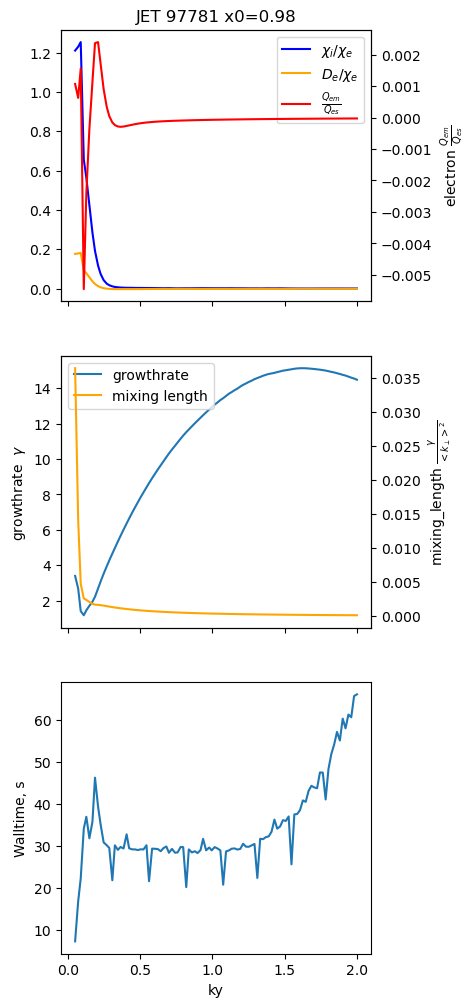

In [17]:
data_set.plot_summary(title='JET 97781 x0=0.98')

In [1]:
(20**3)*100*(1/(60*60))*(1/8)

27.77777777777778

# Check davids vs other grothrates

PLOTTING FOR ky RANGE (0, 0.1)
ky: 0.04939819


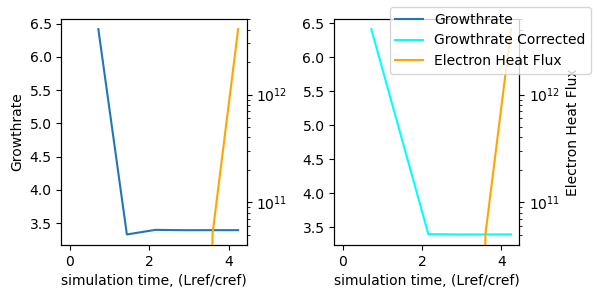

ky: 0.07056885


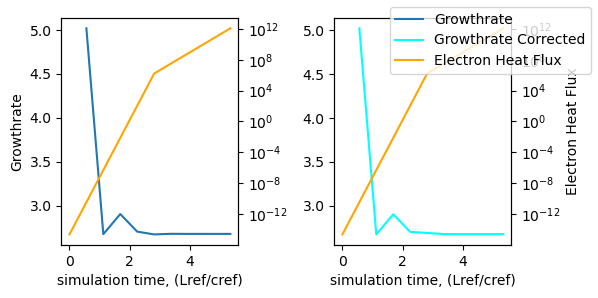

ky: 0.08821106


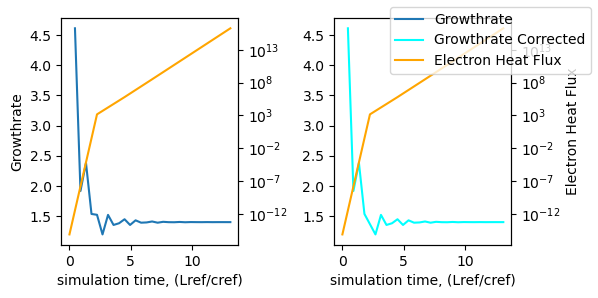

In [24]:
ky_ranges = [(0,0.1),(1.4,1.7),(0.5,0.51)]

for ky_range in ky_ranges:
    print('PLOTTING FOR ky RANGE', ky_range)
    ky_low, ky_high = ky_range
    df = data_set.df
    filtered_df = df[(df['kymin1'] >= ky_low) & (df['kymin1'] <= ky_high)]
    for i, row in filtered_df.iterrows():
        print('ky:', row['kymin1'])
        plot_growthrate(row['scanfiles_path'], row['suffix'])
        # plot_growthrate_history(row['scanfiles_path'], row['suffix'])#, xlim=[5,25], ylim=[0,2])#, xlim=[175, 200], ylim=[0.536,0.537])
        # plt.show()
    break


## 98 Plot Growthrate History for Each ky

In [ ]:
num_samples = 100
num_workers = 8
save_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_98'
ex_id = 'jet_97781_ion-scale_98'
for i in range(num_workers):
    
    scanfiles_dir = os.path.join(save_dir, f'ex-{ex_id}_batch-{i}', 'scanfiles0000')
    for j in range(1,int(num_samples/num_workers)+1):
        suffix = int_to_suffix(j)
        print('batch:',i, 'suffix:',suffix)
        plot_growthrate(scanfiles_dir, suffix)
        # plot_growthrate_history(scanfiles_dir, '0004', xlim=[5,25], ylim=[0,2])#, xlim=[175, 200], ylim=[0.536,0.537])

          
        



# x0 0.9

In [2]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from config import Config
config = Config()
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
parser = GENE_scan_parser()
# save_dir = '/home/djdaniel/DEEPlasma/vault/data_gen_tutorial7'
save_dir='/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_90'
data_set = ScanData2(name='jet_97781_ion-scale_90', config=config, parser=parser, save_dir=save_dir,  split_ratio=[0,0,1], categorise=True)


/pfs/lustrep4/projappl/project_462000451/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:749: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(df_filtered['kymin1'],df_filtered['ratio_iheat_eheat'], 'b',label=f'$\chi_i/ \chi_e$')
/pfs/lustrep4/projappl/project_462000451/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:750: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(df_filtered['kymin1'],df_filtered['ratio_eparticle_eheat'], 'orange', label=f'$D_e/ \chi_e$')
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed fro

Initialising dataset
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_90/ex-jet_97781_ion-scale_90_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering

/pfs/lustrep4/projappl/project_462000451/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.rest_df_no_nan['data_categorie'] = random_categories


In [3]:
data_set.df

,kymin1,growthrate,frequency,scanfiles_path,suffix,run_time,termination_reason,fingerprint,fingerprint_string,ratio_iheat_eheat,...,particle_electromagnetic_Electrons,heat_electrostatic_Electrons,heat_electromagnetic_Electrons,particle_electrostatic_Ions,particle_electromagnetic_Ions,heat_electrostatic_Ions,heat_electromagnetic_Ions,categorisation,avg_kperp_squared,mixing_length
0,0.048352,0.0330,-0.1450,/scratch/project_462000451/gene_out/gene_auto_...,0001,182.086,growthrate_converged,"[MTM, ETG]",MTM-ETG,0.025247,...,5.050700e+11,1.002800e+13,5.313000e+13,-2.733200e+11,5.050700e+11,-3.442900e+11,2.962200e+12,MTM,25.518161,0.001293
1,0.069074,NaN,NaN,/scratch/project_462000451/gene_out/gene_auto_...,0002,380.405,simtimelim,"[MTM, ETG]",MTM-ETG,0.035633,...,6.472200e+02,1.503600e+04,7.212900e+04,-2.537600e+02,6.472200e+02,1.430900e+03,3.474000e+03,MTM,52.077881,NaN
2,0.089796,0.0660,0.0900,/scratch/project_462000451/gene_out/gene_auto_...,0003,202.024,growthrate_converged,[None],None,3.432718,...,-1.172700e+21,4.489800e+22,-1.099200e+22,6.407800e+21,-1.172700e+21,1.125900e+23,-5.799800e+21,Nothing,88.011617,0.000750
3,0.110518,0.0940,0.1130,/scratch/project_462000451/gene_out/gene_auto_...,0004,98.751,growthrate_converged,[None],None,3.205487,...,-3.052600e+11,1.415900e+13,-3.232600e+12,1.891500e+12,-3.052600e+11,3.453600e+13,-1.508600e+12,Nothing,133.319384,0.000705
4,0.131240,0.1240,0.1340,/scratch/project_462000451/gene_out/gene_auto_...,0005,73.959,growthrate_converged,[None],None,3.017712,...,-4.287200e+08,2.349800e+10,-5.068000e+09,2.923200e+09,-4.287200e+08,5.592600e+10,-2.110900e+09,Nothing,188.001150,0.000660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.921212,0.7180,-1.0690,/scratch/project_462000451/gene_out/gene_auto_...,0008,120.553,growthrate_converged,[None],None,0.115732,...,1.697700e+10,1.927900e+15,3.059900e+13,-9.713300e+13,1.697700e+10,-1.690500e+13,2.156700e+11,Nothing,40247.869682,0.000018
96,1.940909,0.7310,-1.0780,/scratch/project_462000451/gene_out/gene_auto_...,0009,114.704,growthrate_converged,[None],None,0.115481,...,4.584900e+09,5.647000e+14,8.995100e+12,-2.837500e+13,4.584900e+09,-4.911500e+12,6.069500e+10,Nothing,41121.216862,0.000018
97,1.960606,0.7440,-1.0890,/scratch/project_462000451/gene_out/gene_auto_...,0010,111.389,growthrate_converged,[None],None,0.115037,...,1.395300e+09,1.777000e+14,2.836000e+12,-8.893500e+12,1.395300e+09,-1.545400e+12,1.852300e+10,Nothing,42003.933802,0.000018
98,1.980303,0.7560,-1.0990,/scratch/project_462000451/gene_out/gene_auto_...,0011,113.188,growthrate_converged,[None],None,0.114899,...,1.151500e+09,1.537600e+14,2.438000e+12,-7.683900e+12,1.151500e+09,-1.333700e+12,1.550700e+10,Nothing,42896.029021,0.000018


In [ ]:
type(data_set.df['suffix'].iloc[0])

numpy.int64

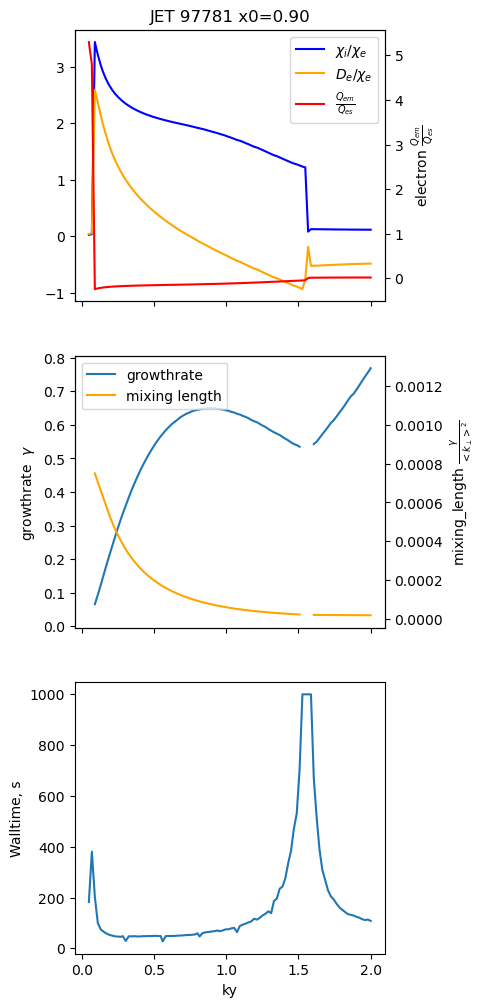

In [13]:
data_set.plot_summary(title='JET 97781 x0=0.90')

# Plot for ky range

In [ ]:
# ky_ranges = [(0,0.1),(1.4,1.7),(0.5,0.51),(1.45,1.5)]
ky_ranges = [(0,1)]

for ky_range in ky_ranges:
    print('PLOTTING FOR ky RANGE', ky_range)
    ky_low, ky_high = ky_range
    df = data_set.df
    filtered_df = df[(df['kymin1'] >= ky_low) & (df['kymin1'] <= ky_high)]
    for i, row in filtered_df.iterrows():
        print('ky:', row['kymin1'])
        print(row['scanfiles_path'], row['suffix'])
        plot_growthrate(row['scanfiles_path'], row['suffix'])

## Plot for Every ky

In [ ]:
import os
num_samples = 100
num_workers = 8
save_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_90'
ex_id = 'jet_97781_ion-scale_90'
for i in range(num_workers):
    scanfiles_dir = os.path.join(save_dir, f'ex-{ex_id}_batch-{i}', 'scanfiles0000')
    for j in range(1,int(num_samples/num_workers)+1):
        suffix = int_to_suffix(j)
        print('batch:',i, 'suffix:',suffix)
        
        plot_growthrate(scanfiles_dir, suffix)